# Первый computational notebook

## Упражнение: Вычисление числа pi с помощью метода Монте-Карло

Каждый пронумерованный элемент будет представлять собой новую ячейку. Нажмите `SHIFT
+ENTER`, чтобы запустить ячейку и создать новую ячейку ниже. Выбрав ячейку, нажмите
`ESCAPE` для перехода в командный режим. Используйте клавиши `M` и `Y` для изменения ячеек
на разметку и код.

# Вычисление числа Пи с помощью метода Монте - Карло

## Формулы

- Площадь квадрата: $S = (2 r)^2$
- Площадь круга: $C = \pi r^2$
- $C/S = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * C/S$

![Дротики](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
num_points = 1000

In [3]:
points = []
hits = 0 
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits += 1
        points.append((x,y,"red"))
    else:
        points.append((x,y,"blue"))

Pi =  3.128


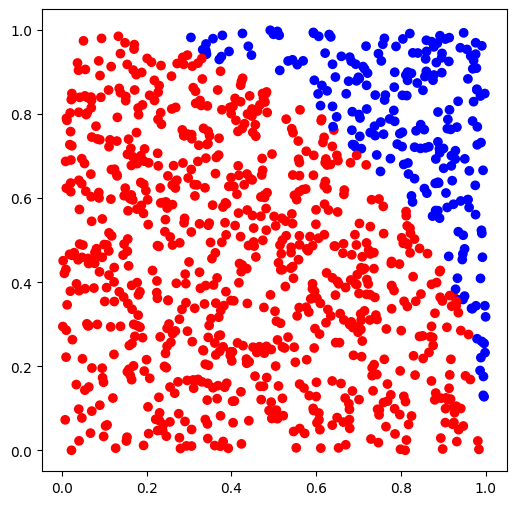

In [4]:
x, y, colors = zip(*points)

fig, ax = plt.subplots() 
fig.set_size_inches(6.0, 6.0)

ax.scatter(x,y, c = colors)

fraction = hits / num_points
print("Pi = ", 4* fraction)

## Блокноты и контроль версий

### Упражнение: что происходит без `requirements.txt`?

In [5]:
!python -m pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!python -m pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!python3 -m pip install -r requirements.txt


Defaulting to user installation because normal site-packages is not writeable


### Консольные команды, виджеты оболочки и немного магии (cell magic)

In [8]:
from matplotlib import pyplot
import random
from ipywidgets import interact, widgets

%matplotlib inline

def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
        else:
            points.append((x, y, False))
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points


def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)


def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

interactive(children=(IntSlider(value=1000, description='num_points', max=10000, min=100, step=100), Output())…

<function __main__.experiment(num_points)>

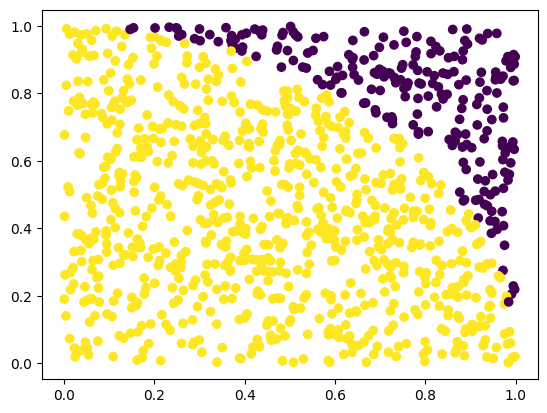

In [9]:
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100, value=1000))

### Виджеты для интерактивной подгонки данных (data fitting)

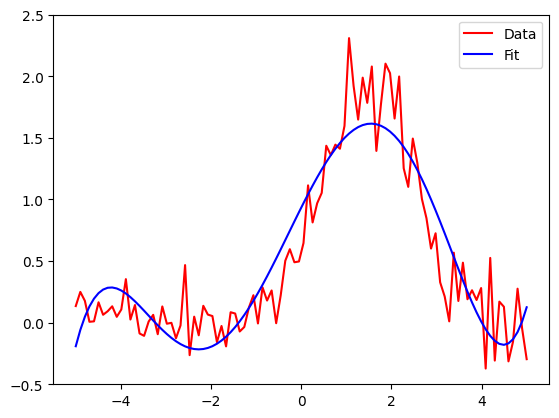

In [10]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)


def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y


def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit


def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()


x, y = noisy_gaussian()
yfit = fit(x, y, n=5)  # fit a 5th order polynomial to it
plot(x, y, yfit)

### Профилирование ячеек

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [12]:
def step():
    return 1 if random.random() > .5 else -1

In [13]:
def walk(n):
    x = np.zeros(n)
    dx = 1 / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0
        else:
            x[i + 1] = x_new
    return x

21.4 ms ± 341 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
 

UsageError: Line magic function `%lprun` not found.


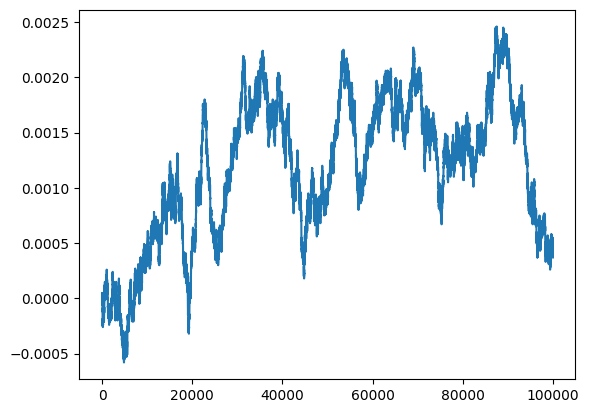

         200137 function calls (200134 primitive calls) in 0.050 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.029    0.029    0.050    0.050 1491881381.py:1(walk)
    99999    0.014    0.000    0.021    0.000 24835620.py:1(step)
    99999    0.006    0.000    0.006    0.000 {method 'random' of '_random.Random' objects}
      2/1    0.000    0.000    0.050    0.050 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        2    0.000    0.000    0.000    0.000 attrsettr.py:66(_get_attr_opt)
        1    0.000    0.000    0.000    0.000 socket.py:774(recv_multipart)
        2    0.000    0.000    0.000    0.000 attrsettr.py:43(__getattr__)
        1    0.000    0.000    0.000    0.000 zmqstream.py:583(_handle_events)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1390(_handle_fromlist)
        7    0.000 

In [14]:
n = 100000
x = walk(n)
plt.plot(x)
t1 = %timeit -o walk(n)
%prun walk(n)
%lprun -f walk walk(10000)

### Установка команды для профилирования строк

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def step():
    import random
    return 1. if random.random() > .5 else -1.


def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x


n = 100000
x = walk(n)

In [ ]:
%pip install line_profiler
%load_ext line_profiler
%lprun
%lprun -f walk walk(10000)
%lprun -f step walk(10000)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-09 s

Total time: 0.0165759 s
File: /tmp/ipykernel_55422/20568004.py
Function: step at line 5

Line #      Hits         Time  Per Hit   % Time  Line Contents
     5                                           def step():
     6      9999    3351819.0    335.2     20.2      import random
     7      9999   13224066.0   1322.5     79.8      return 1. if random.random() > .5 else -1.